<a href="https://colab.research.google.com/github/AhmedKaramDev/DataScience-In-Health/blob/master/Fast_EDA_with_SweetViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
We have a data and we want to get some insights from this data, our goal is to know why people do not show after booking an appointment.

## 1- Setup the Environment

### Load The Needed Packages

In [ ]:
! pip install sweetviz

     |████████████████████████████████| 15.1MB 304kB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import numpy as np # linear algebra
import pandas as pd # loading data
import sweetviz

### Clone the repo and extract the data

In [ ]:
# clone the repository
! git clone https://github.com/AhmedKaramDev/DataScience-In-Health.git
%cd DataScience-In-Health

Cloning into 'DataScience-In-Health'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.
/content/DataScience-In-Health


In [ ]:
# unzip the file
!unzip "Dataset_for_patients_appointment.zip"

Archive:  Dataset_for_patients_appointment.zip
  inflating: Dataset for patients appointment.csv  
  inflating: neighborhood_locations.csv  


## 2- Reading the data

In [ ]:
df = pd.read_csv('Dataset for patients appointment.csv', encoding='UTF-8')
df.head()

,Unnamed: 0,رقم المريض,رقم الموعد,النوع,يوم الجدولة,يوم الموعد,العمر,الحي,موعد مجاني,الضغط,السكري,ذو احتياجات خاصة,استلم رسالة نصية,لم يظهر
0,0,2.987250e+13,5642903,F,2020-04-29 18:38:08+00:00,2020-04-29 00:00:00+00:00,62,Al-Malga,0,1,0,0,0,No
1,1,5.589978e+14,5642503,M,2020-04-29 16:08:27+00:00,2020-04-29 00:00:00+00:00,56,Al-Malga,0,0,0,0,0,No
2,2,8.841186e+12,5642494,F,2020-04-29 16:07:23+00:00,2020-04-29 00:00:00+00:00,56,Al-Malga,0,1,1,0,0,No
3,3,5.434176e+12,5552915,F,2020-04-06 18:00:29+00:00,2020-04-29 00:00:00+00:00,69,Al-Malga,0,1,0,0,1,No
4,4,2.817984e+13,5642697,M,2020-04-29 16:48:41+00:00,2020-04-29 00:00:00+00:00,56,Al-Malga,0,0,0,0,0,No


## 3- Preprocess the Data 

### Remove the data that will not effect  on our work.


In [ ]:
# take look on the columns names
df.columns

Index(['Unnamed: 0', 'رقم المريض', 'رقم الموعد', 'النوع', 'يوم الجدولة',
       'يوم الموعد', 'العمر', 'الحي', 'موعد مجاني', 'الضغط', 'السكري',
       'ذو احتياجات خاصة', 'استلم رسالة نصية', 'لم يظهر'],
      dtype='object')

In [ ]:
df.drop(['رقم المريض', 'رقم الموعد',"Unnamed: 0"], axis=1, inplace=True)

### Check the quality of the data and data types of each column.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71615 entries, 0 to 71614
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   النوع             71615 non-null  object
 1   يوم الجدولة       71615 non-null  object
 2   يوم الموعد        71615 non-null  object
 3   العمر             71615 non-null  int64 
 4   الحي              71615 non-null  object
 5   موعد مجاني        71615 non-null  int64 
 6   الضغط             71615 non-null  int64 
 7   السكري            71615 non-null  int64 
 8   ذو احتياجات خاصة  71615 non-null  int64 
 9   استلم رسالة نصية  71615 non-null  int64 
 10  لم يظهر           71615 non-null  object
dtypes: int64(6), object(5)
memory usage: 6.0+ MB


In [ ]:
df.head()

,النوع,يوم الجدولة,يوم الموعد,العمر,الحي,موعد مجاني,الضغط,السكري,ذو احتياجات خاصة,استلم رسالة نصية,لم يظهر
0,F,2020-04-29 18:38:08+00:00,2020-04-29 00:00:00+00:00,62,Al-Malga,0,1,0,0,0,No
1,M,2020-04-29 16:08:27+00:00,2020-04-29 00:00:00+00:00,56,Al-Malga,0,0,0,0,0,No
2,F,2020-04-29 16:07:23+00:00,2020-04-29 00:00:00+00:00,56,Al-Malga,0,1,1,0,0,No
3,F,2020-04-06 18:00:29+00:00,2020-04-29 00:00:00+00:00,69,Al-Malga,0,1,0,0,1,No
4,M,2020-04-29 16:48:41+00:00,2020-04-29 00:00:00+00:00,56,Al-Malga,0,0,0,0,0,No


In [ ]:
print("Number of records (patients): ", df.shape[0])
print("Number of columns (features): ", df.shape[1])

Number of records (patients):  71615
Number of columns (features):  11


### Cleaning & preparing the data

In [ ]:
# Convert columns to date type
df['يوم الجدولة'] = pd.to_datetime(df['يوم الجدولة']).dt.date.astype('datetime64')
df['يوم الموعد'] = pd.to_datetime(df['يوم الموعد']).dt.date.astype('datetime64')

### Feature engineering
is the process of getting more features from our data

In [ ]:
df['ايام الانتظار'] = (df['يوم الموعد'] - df['يوم الجدولة'])
df['ايام الانتظار'] = df['ايام الانتظار'].dt.days

In [ ]:
df[df['ايام الانتظار'] < 0]

,النوع,يوم الجدولة,يوم الموعد,العمر,الحي,موعد مجاني,الضغط,السكري,ذو احتياجات خاصة,استلم رسالة نصية,لم يظهر,ايام الانتظار
15806,M,2020-05-04,2020-05-03,7,Rawdhah,0,0,0,0,0,Yes,-1
54317,M,2020-05-10,2020-05-09,38,Muhammadiyya,0,0,0,1,0,Yes,-1
62515,F,2020-05-18,2020-05-17,19,King Fahd District,0,0,0,1,0,Yes,-1
62661,F,2020-05-11,2020-05-05,81,King Fahd District,0,0,0,0,0,Yes,-6


In [ ]:
c1 = np.where((df['يوم الموعد']-df['يوم الجدولة']).dt.days < 0, df['يوم الجدولة'], df['يوم الموعد'])
c2 = np.where((df['يوم الموعد']-df['يوم الجدولة']).dt.days < 0,df['يوم الموعد'],df['يوم الجدولة'] )

In [ ]:
df['يوم الموعد'] = c1
df['يوم الجدولة'] = c2

In [ ]:
df['ايام الانتظار'] = (df['يوم الموعد'] - df['يوم الجدولة'])
df['ايام الانتظار'] = df['ايام الانتظار'].dt.days

In [ ]:
df[df['ايام الانتظار'] < 0]

,النوع,يوم الجدولة,يوم الموعد,العمر,الحي,موعد مجاني,الضغط,السكري,ذو احتياجات خاصة,استلم رسالة نصية,لم يظهر,ايام الانتظار


In [ ]:
# rename columns
df.rename({"لم يظهر":"الحضور"},axis=1,inplace=True)

In [ ]:
df.head()

,النوع,يوم الجدولة,يوم الموعد,العمر,الحي,موعد مجاني,الضغط,السكري,ذو احتياجات خاصة,استلم رسالة نصية,الحضور,ايام الانتظار
0,F,2020-04-29,2020-04-29,62,Al-Malga,0,1,0,0,0,No,0
1,M,2020-04-29,2020-04-29,56,Al-Malga,0,0,0,0,0,No,0
2,F,2020-04-29,2020-04-29,56,Al-Malga,0,1,1,0,0,No,0
3,F,2020-04-06,2020-04-29,69,Al-Malga,0,1,0,0,1,No,23
4,M,2020-04-29,2020-04-29,56,Al-Malga,0,0,0,0,0,No,0


In [ ]:
df['الحضور'] = df['الحضور'].apply(lambda x: 'حاضر' if x == "No" else 'غايب')

In [ ]:
df['اليوم'] = df['يوم الموعد'].apply(lambda x: x.weekday())
replace_map = {'اليوم': {0: 'Monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'Friday', 5: 'Saturday', 6:'Sunday'}}
df.replace(replace_map, inplace=True)

In [ ]:
df['الشهر'] = df['يوم الموعد'].dt.month_name()

In [ ]:
df.head()

,النوع,يوم الجدولة,يوم الموعد,العمر,الحي,موعد مجاني,الضغط,السكري,ذو احتياجات خاصة,استلم رسالة نصية,الحضور,ايام الانتظار,اليوم,الشهر
0,F,2020-04-29,2020-04-29,62,Al-Malga,0,1,0,0,0,حاضر,0,wednesday,April
1,M,2020-04-29,2020-04-29,56,Al-Malga,0,0,0,0,0,حاضر,0,wednesday,April
2,F,2020-04-29,2020-04-29,56,Al-Malga,0,1,1,0,0,حاضر,0,wednesday,April
3,F,2020-04-06,2020-04-29,69,Al-Malga,0,1,0,0,1,حاضر,23,wednesday,April
4,M,2020-04-29,2020-04-29,56,Al-Malga,0,0,0,0,0,حاضر,0,wednesday,April


### Dealing with missing values

In [ ]:
df.isnull().sum()

النوع               0
يوم الجدولة         0
يوم الموعد          0
العمر               0
الحي                0
موعد مجاني          0
الضغط               0
السكري              0
ذو احتياجات خاصة    0
استلم رسالة نصية    0
الحضور              0
ايام الانتظار       0
اليوم               0
الشهر               0
dtype: int64

In [ ]:
df.head()

,النوع,يوم الجدولة,يوم الموعد,العمر,الحي,موعد مجاني,الضغط,السكري,ذو احتياجات خاصة,استلم رسالة نصية,الحضور,ايام الانتظار,اليوم,الشهر
0,F,2020-04-29,2020-04-29,62,Al-Malga,0,1,0,0,0,حاضر,0,wednesday,April
1,M,2020-04-29,2020-04-29,56,Al-Malga,0,0,0,0,0,حاضر,0,wednesday,April
2,F,2020-04-29,2020-04-29,56,Al-Malga,0,1,1,0,0,حاضر,0,wednesday,April
3,F,2020-04-06,2020-04-29,69,Al-Malga,0,1,0,0,1,حاضر,23,wednesday,April
4,M,2020-04-29,2020-04-29,56,Al-Malga,0,0,0,0,0,حاضر,0,wednesday,April


In [ ]:
analyzed_report = sweetviz.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1576 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1590 missing from current font.
  font.set_text(s


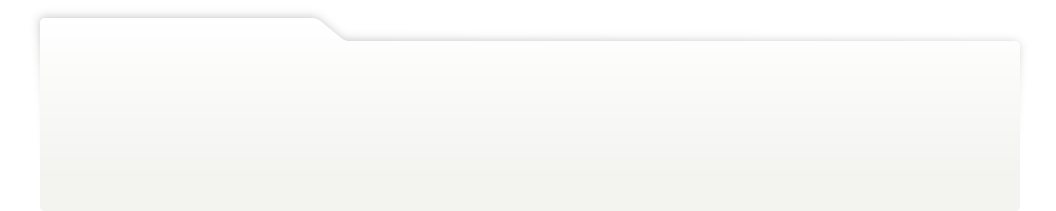
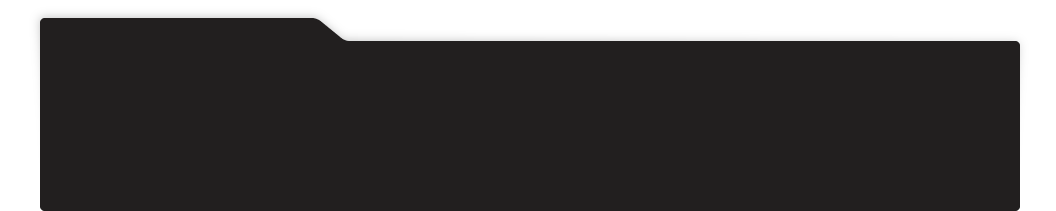
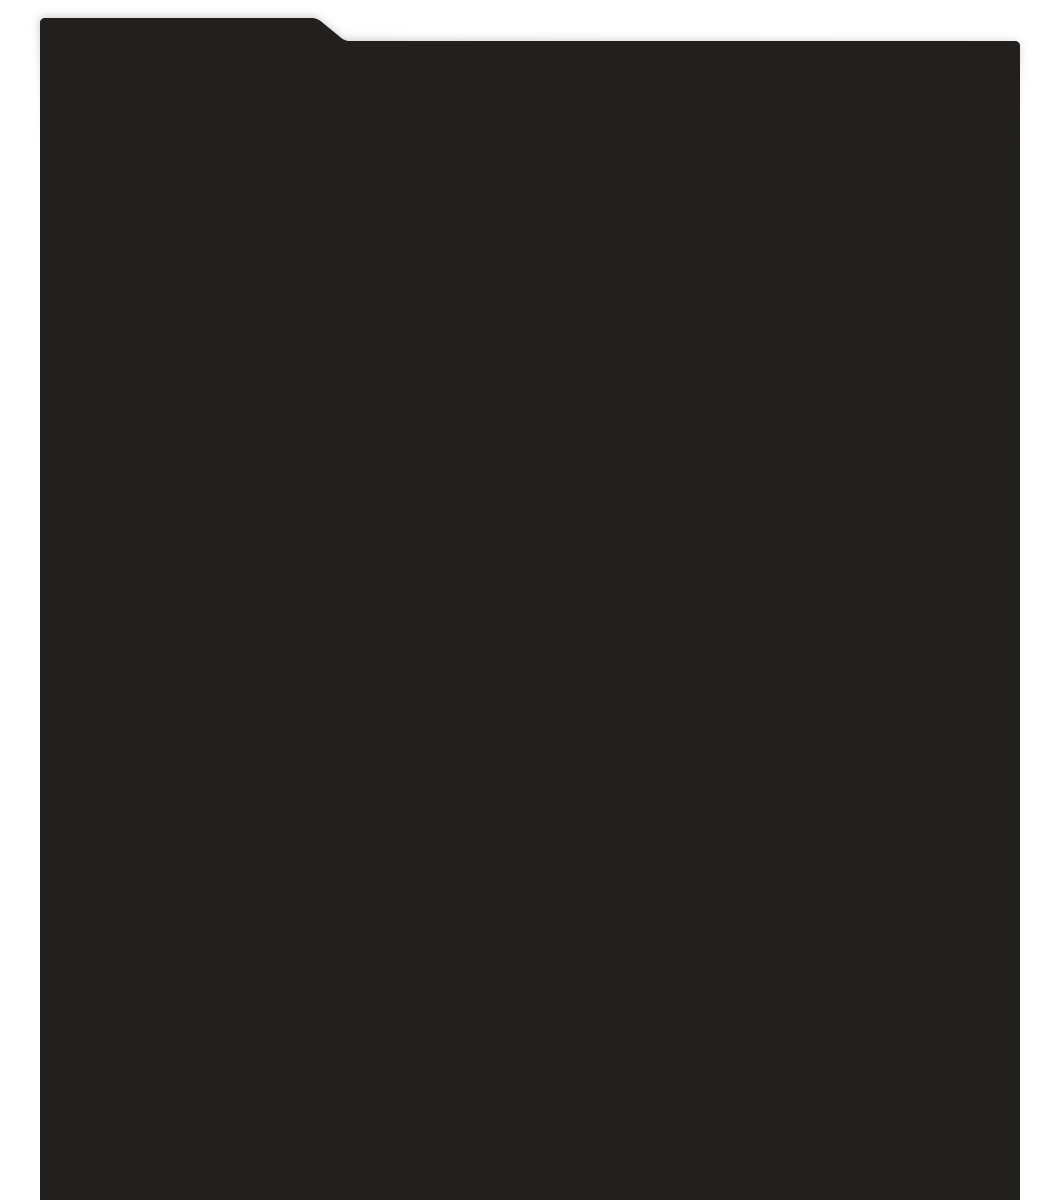
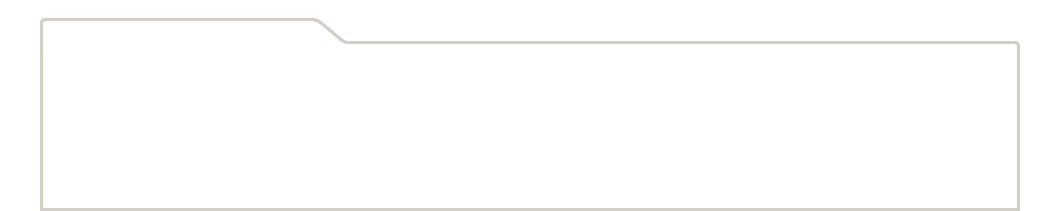
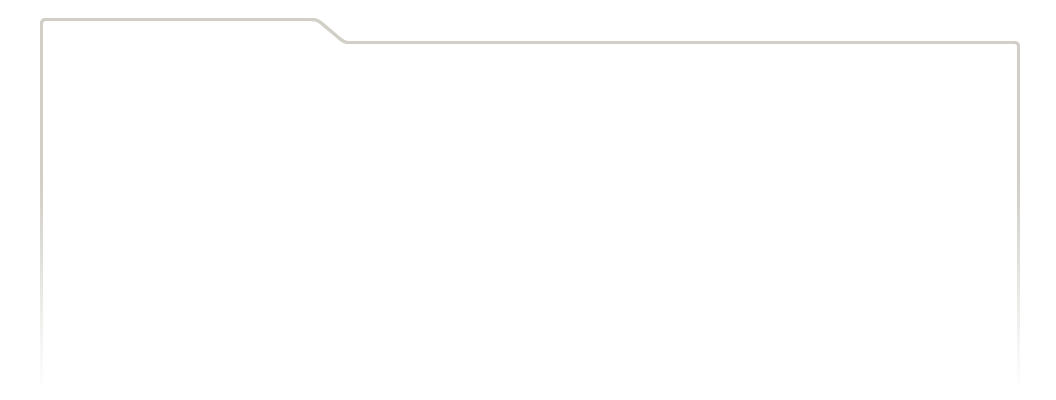
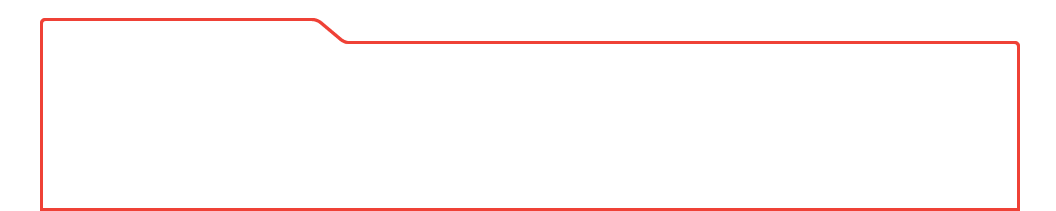
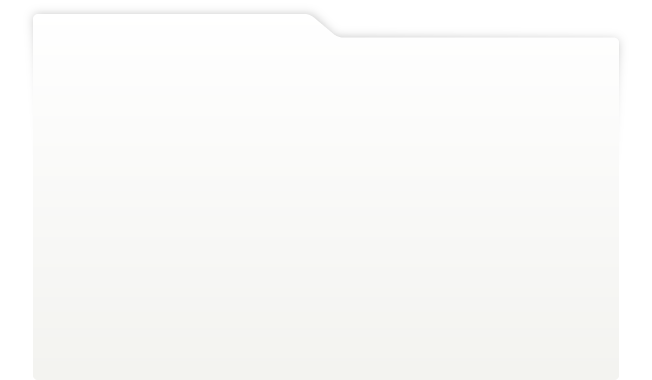
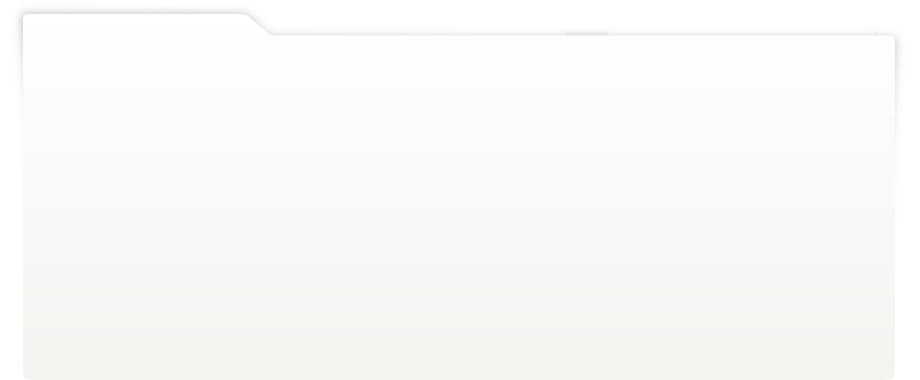
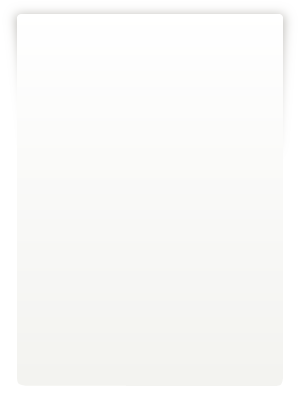
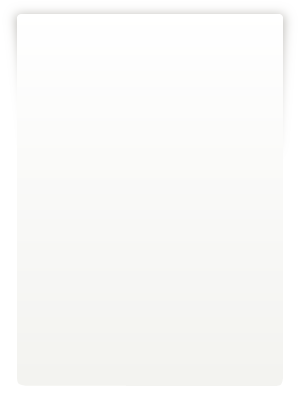
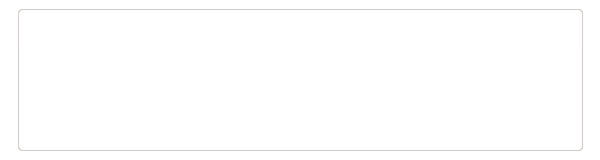
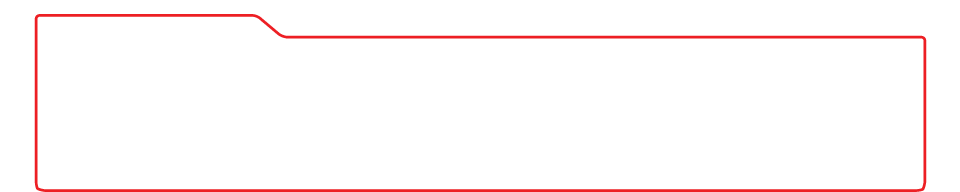
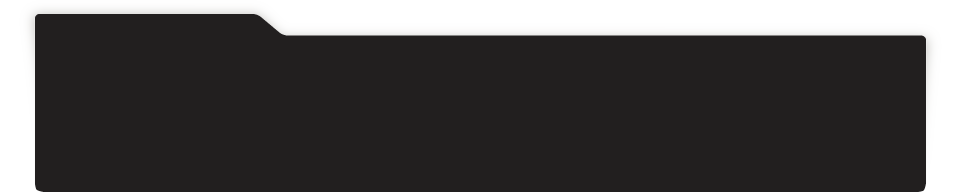
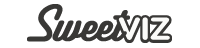
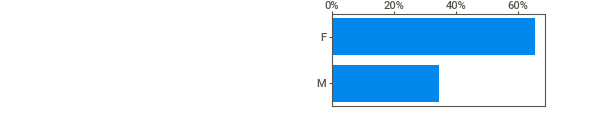
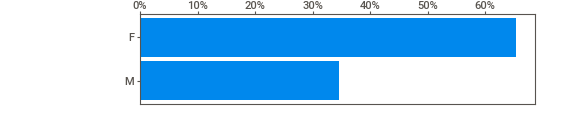
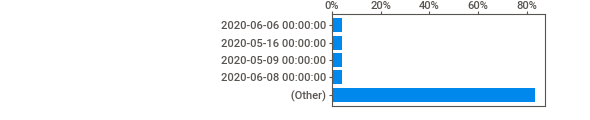
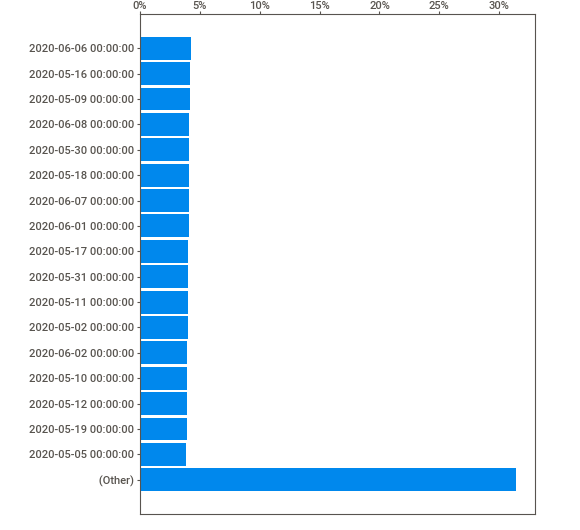
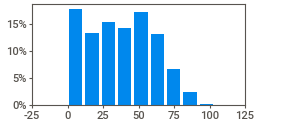
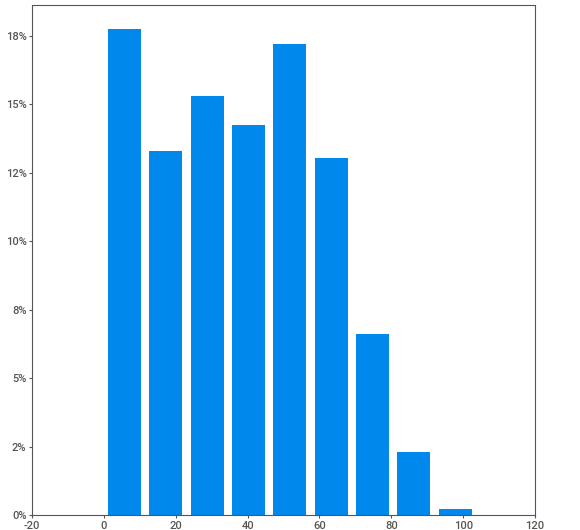
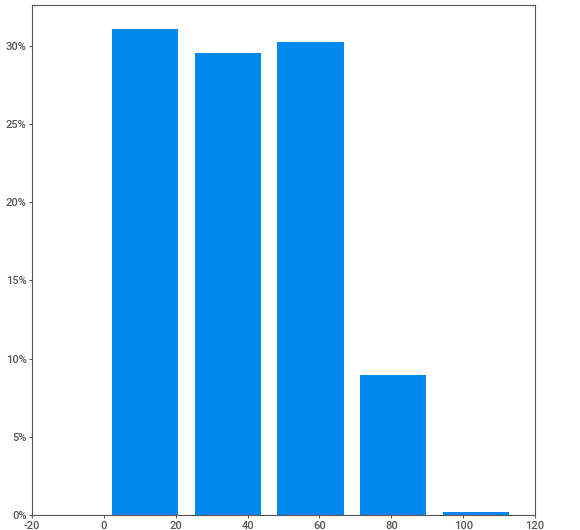
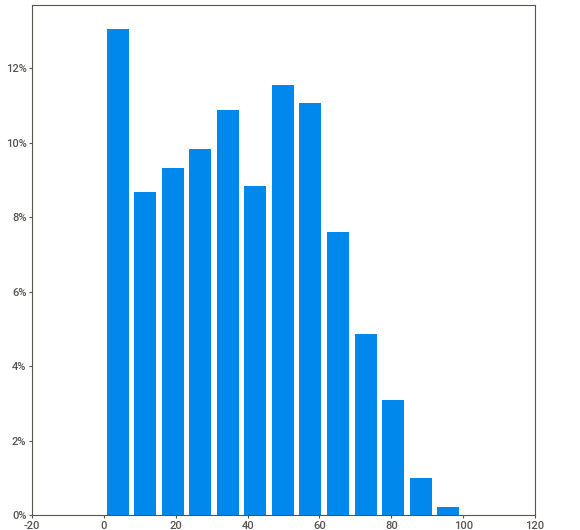
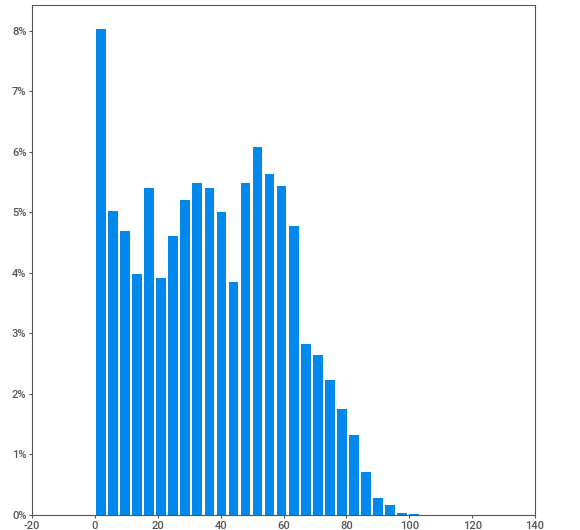
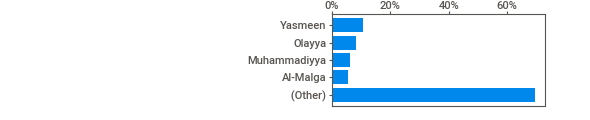
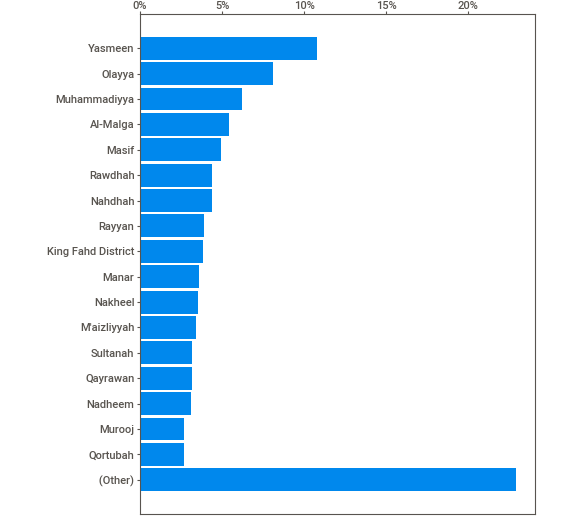
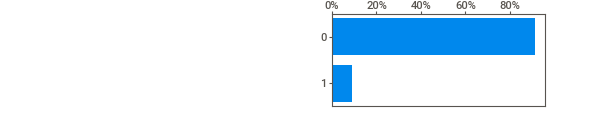
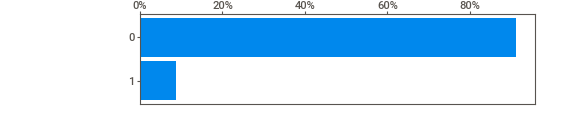
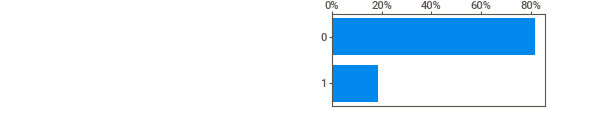
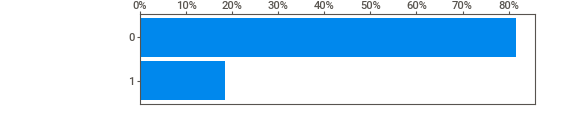
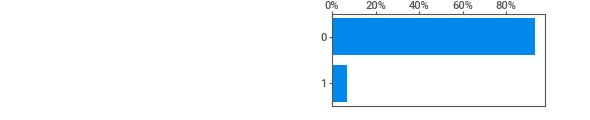
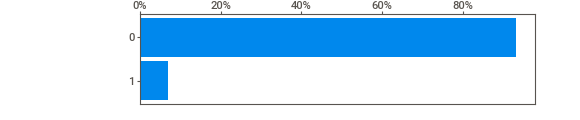
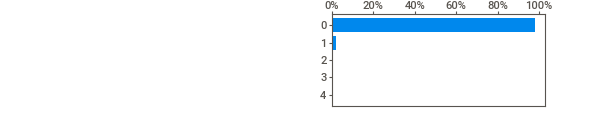
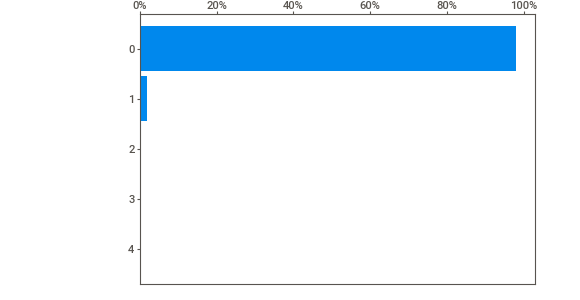
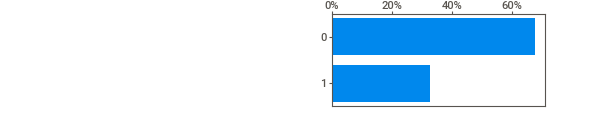
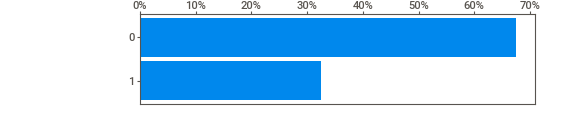
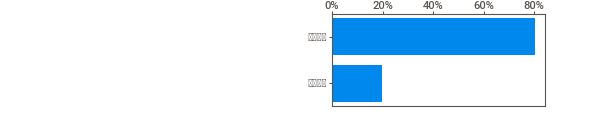
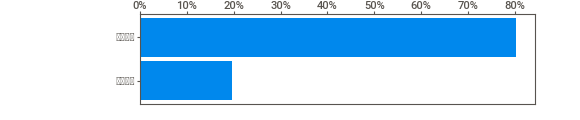
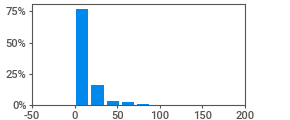
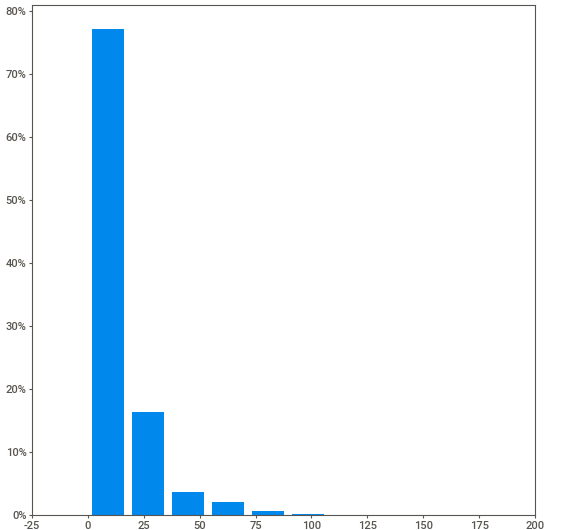
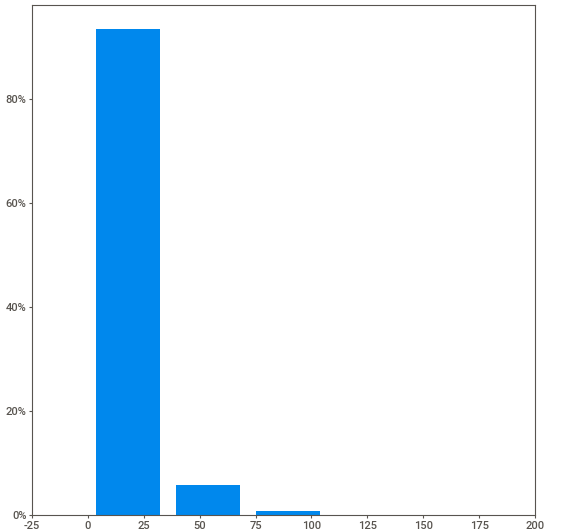
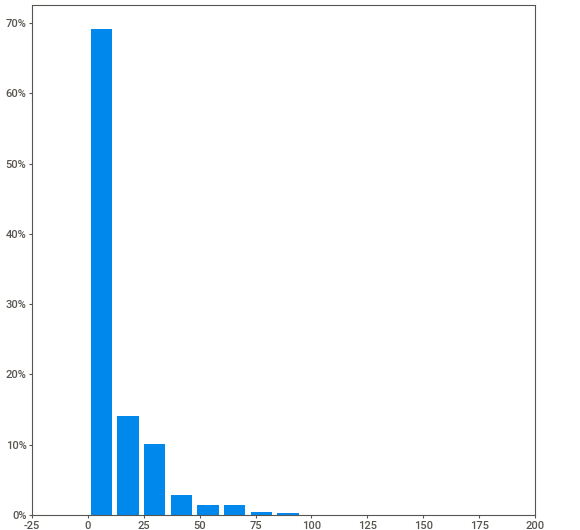
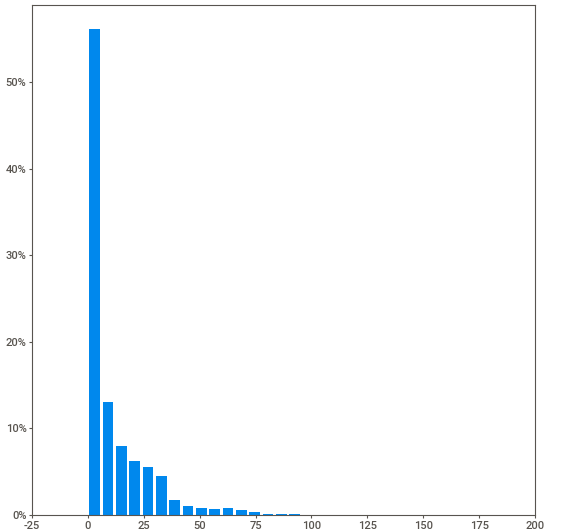
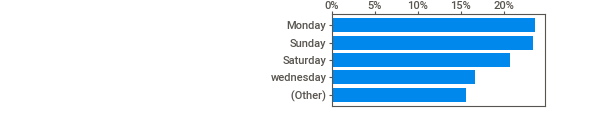
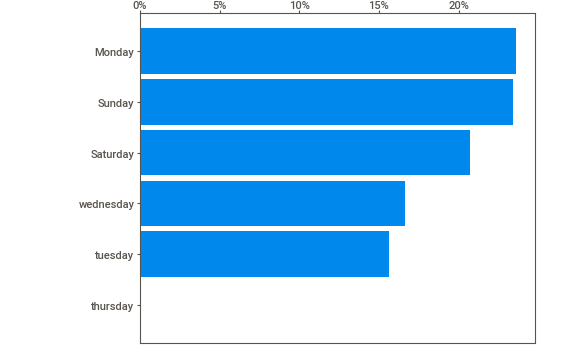
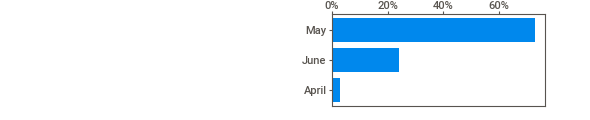
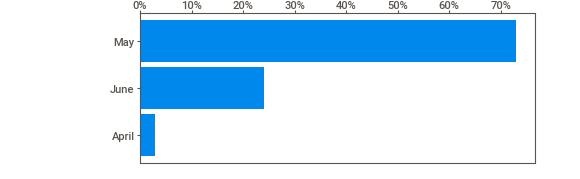
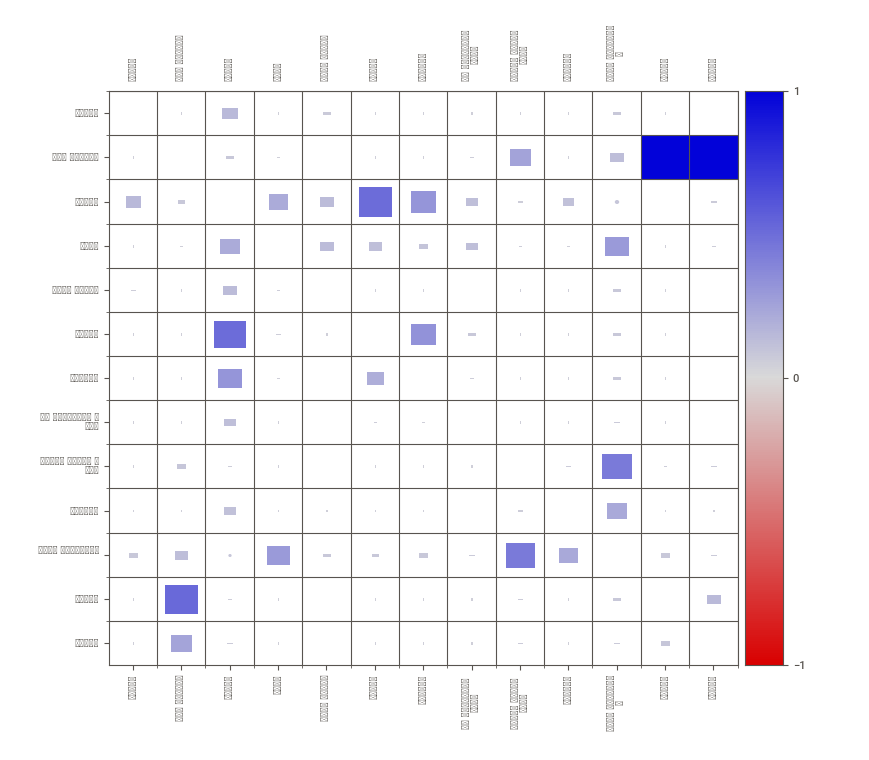
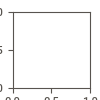

In [ ]:
analyzed_report.show_notebook()

In [ ]:
my_report = sweetviz.compare_intra(df, df["النوع"] == "M", ["Male", "Female"])

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de


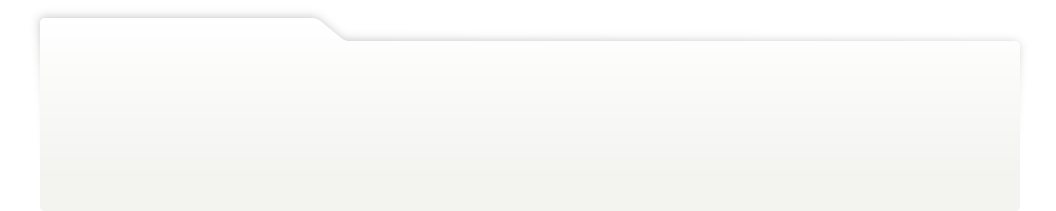
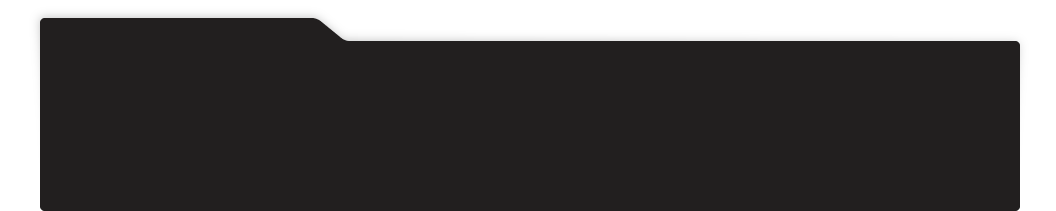
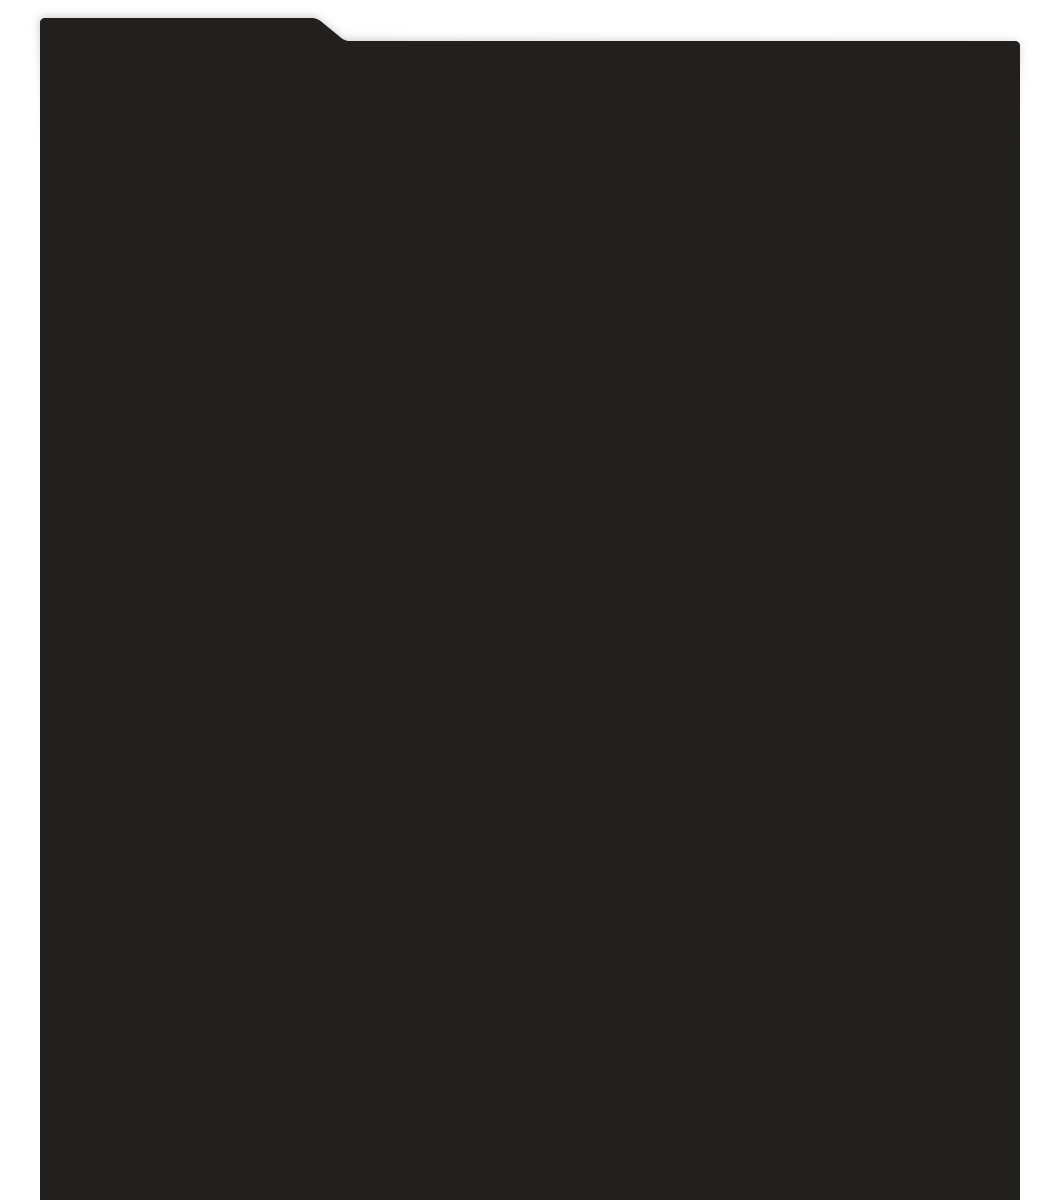
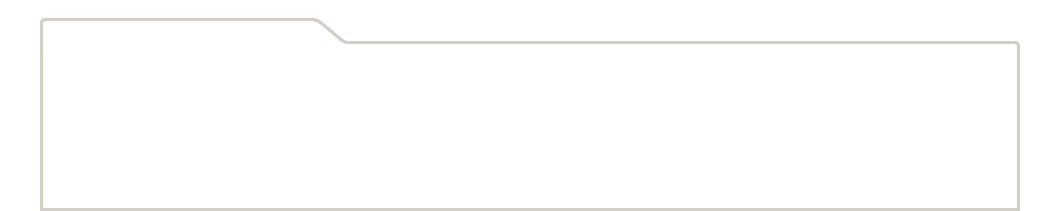
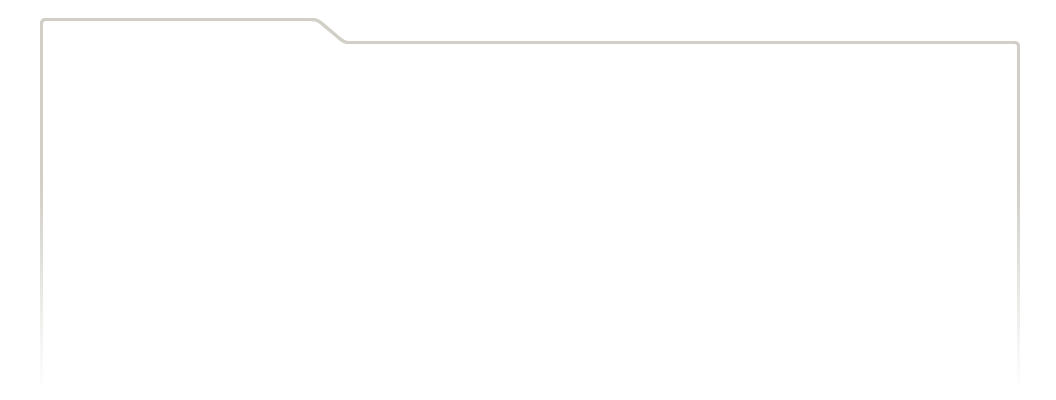
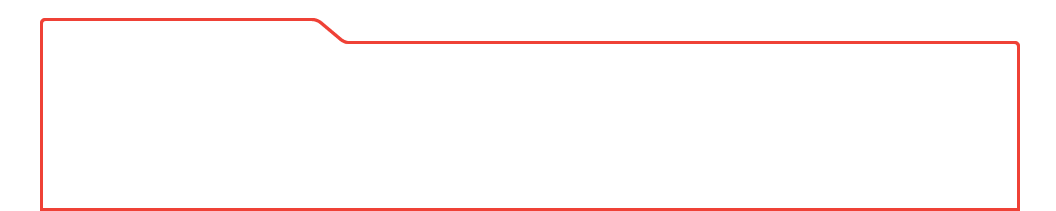
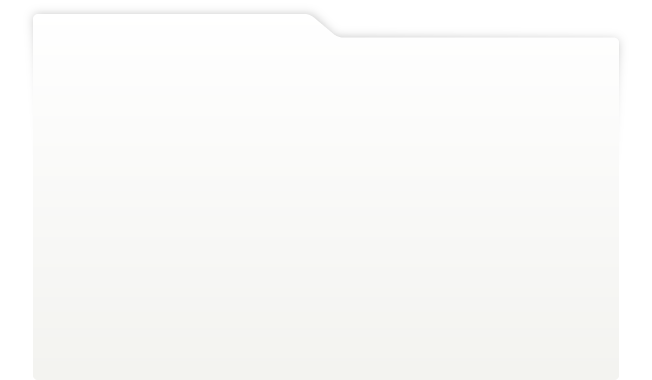
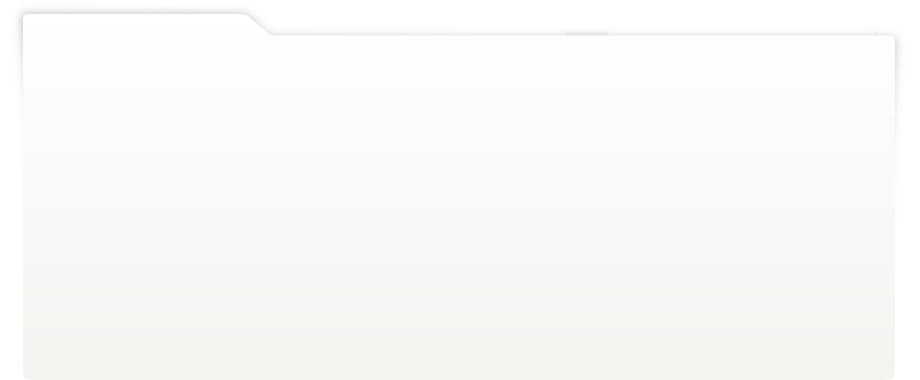
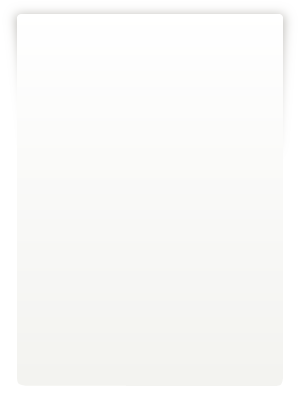
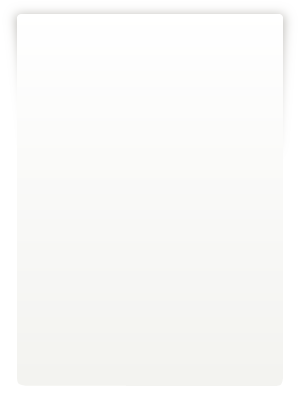
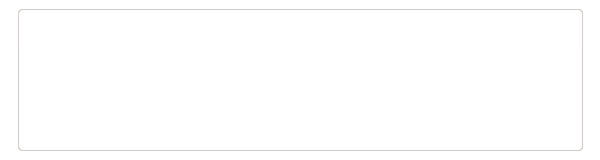
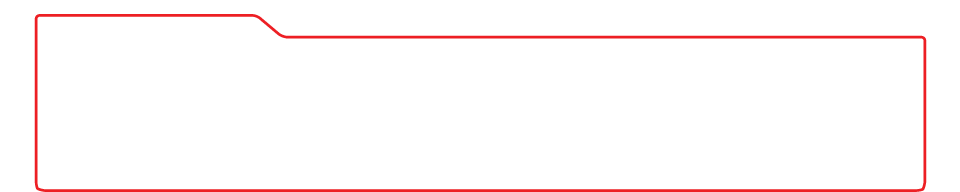
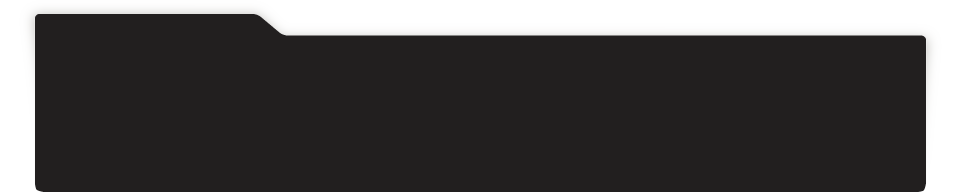
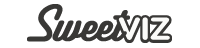
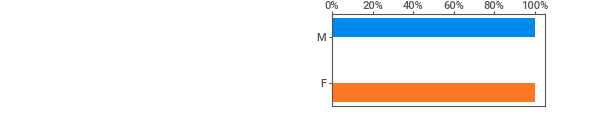
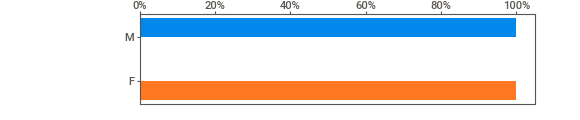
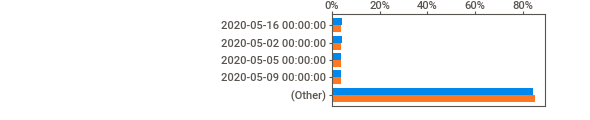
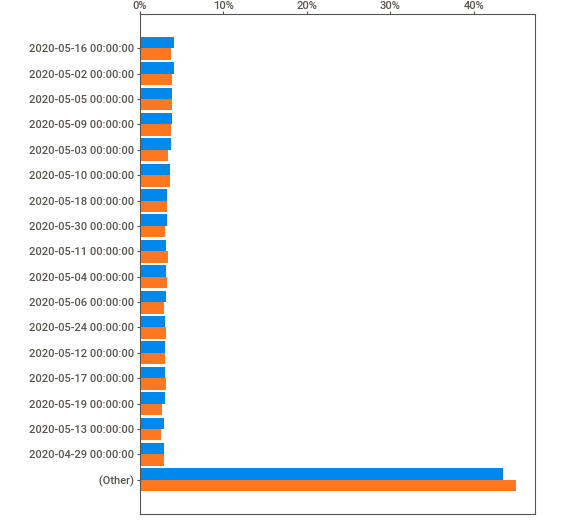
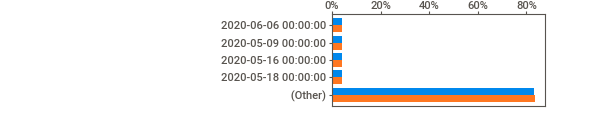
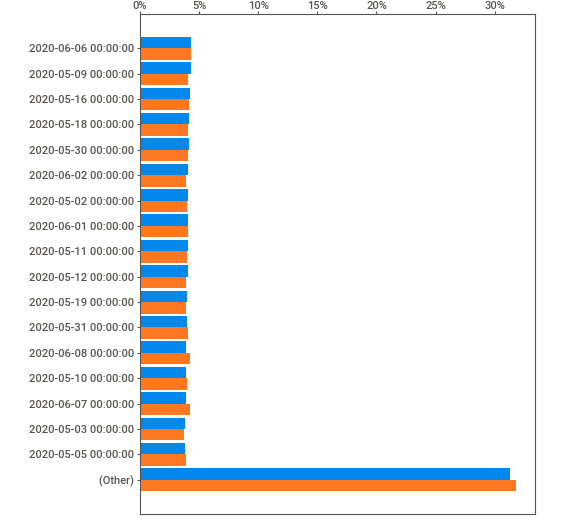
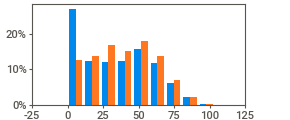
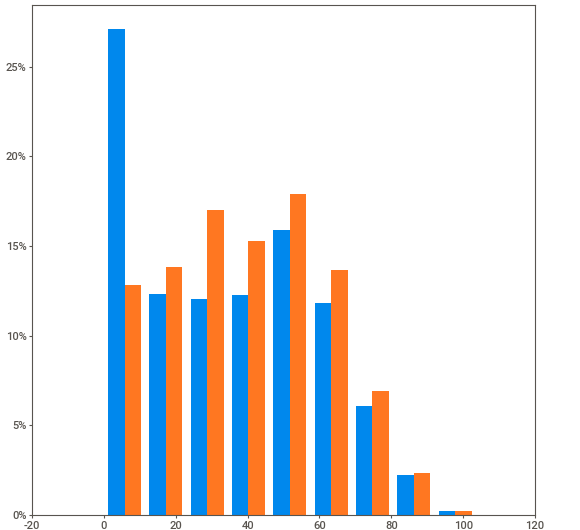
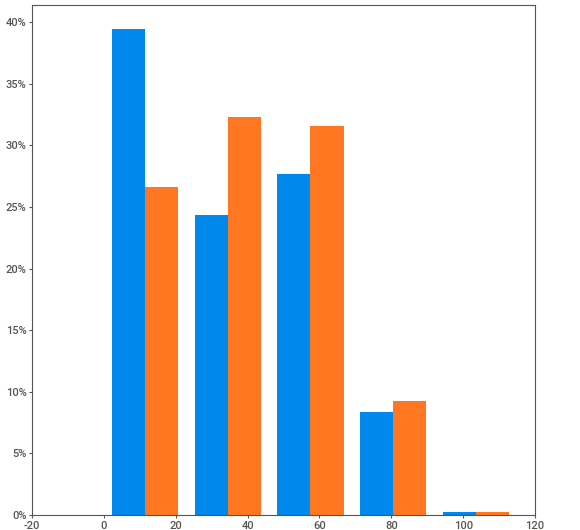
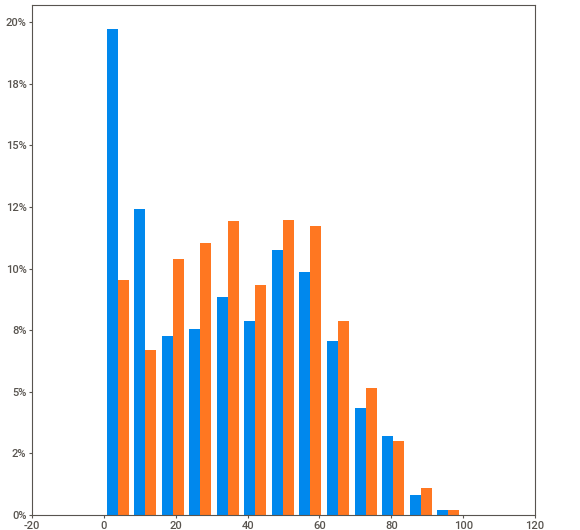
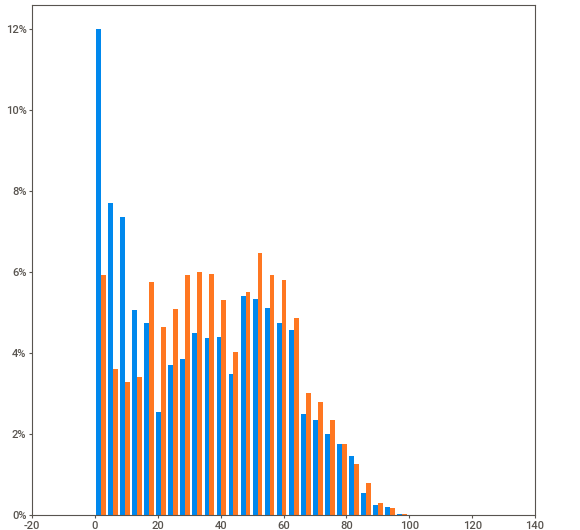
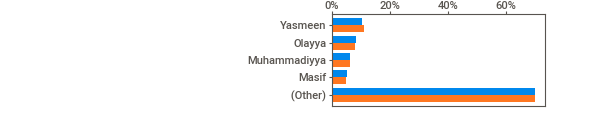
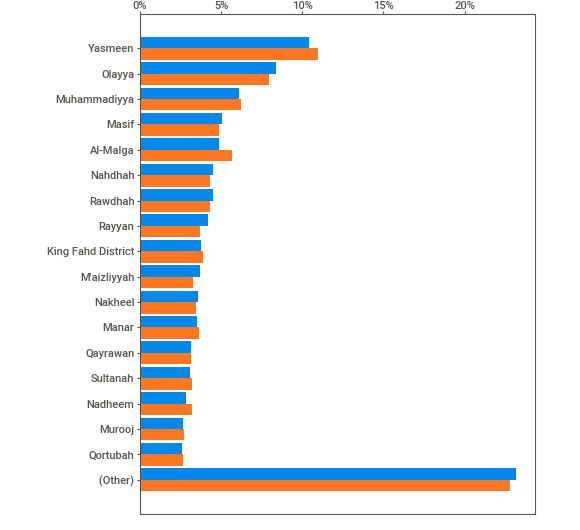
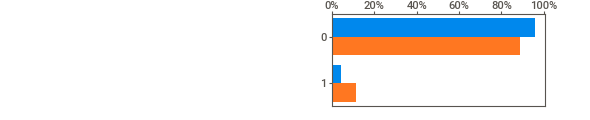
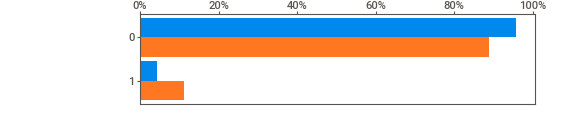
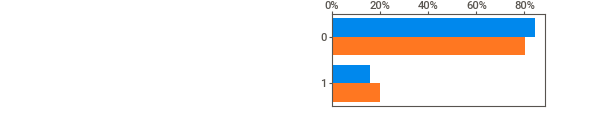
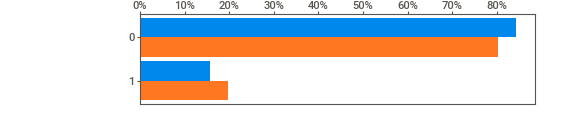
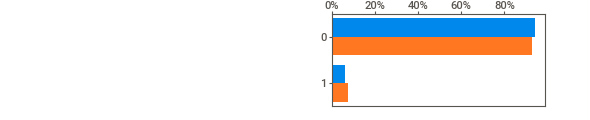
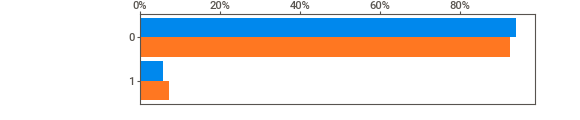
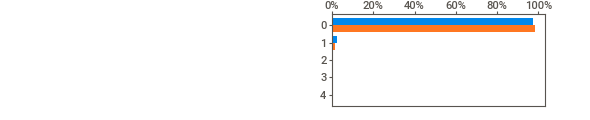
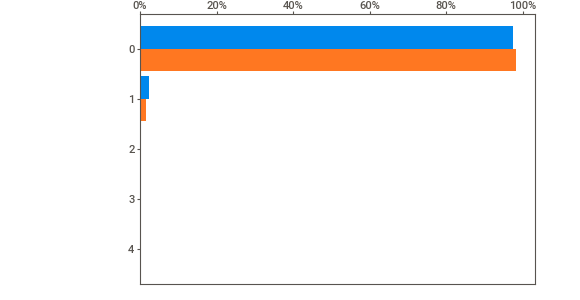
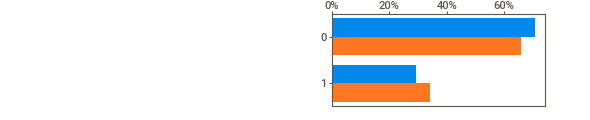
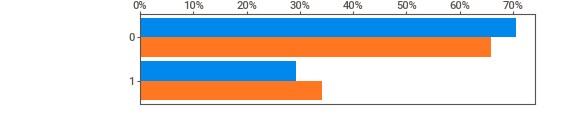
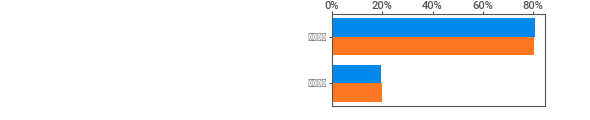
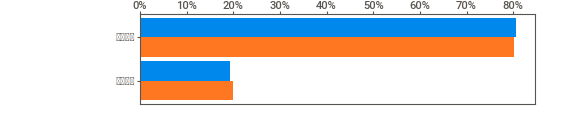
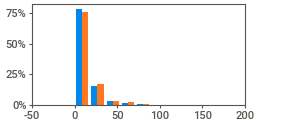
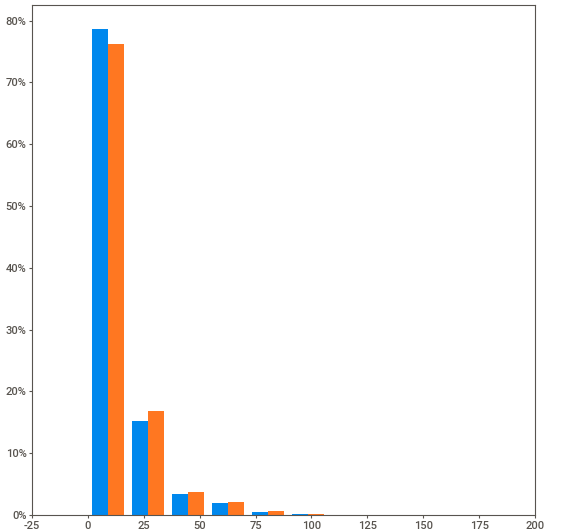
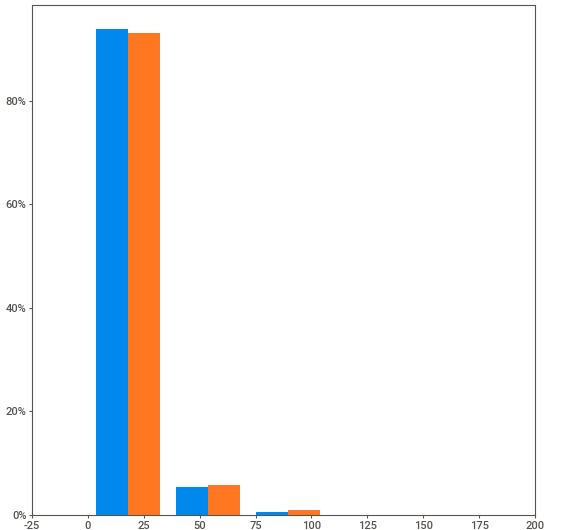
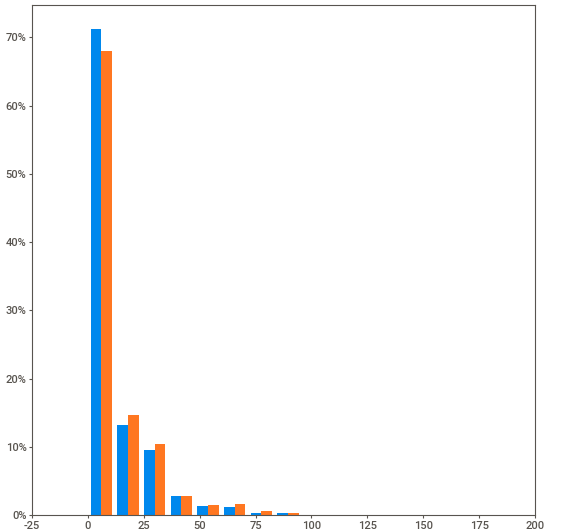
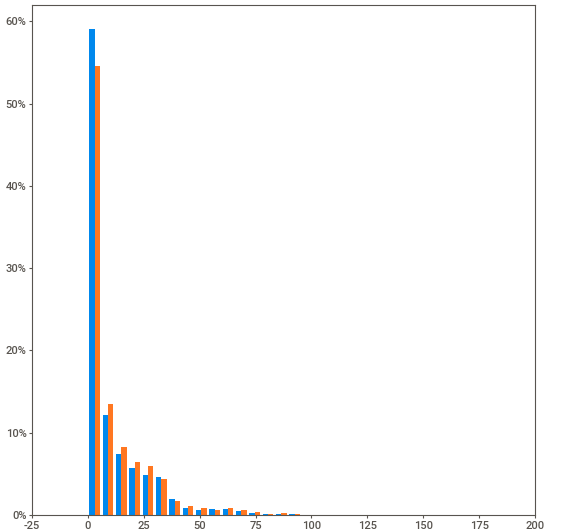
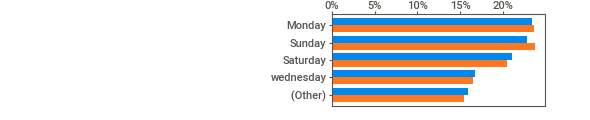
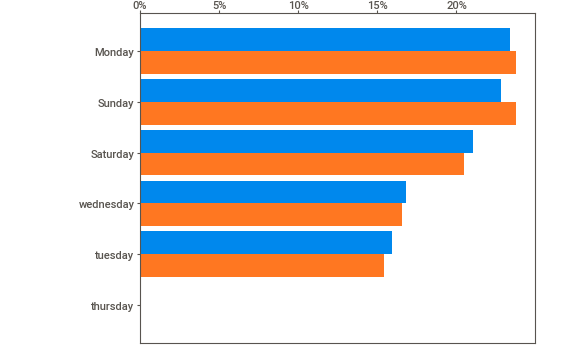
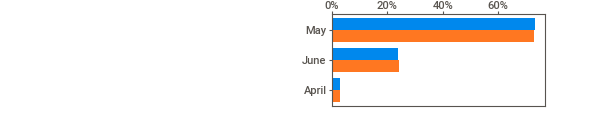
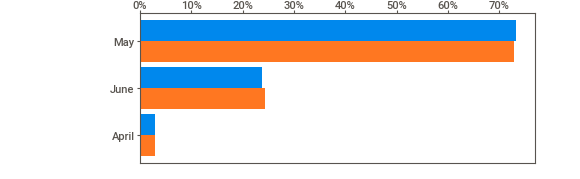
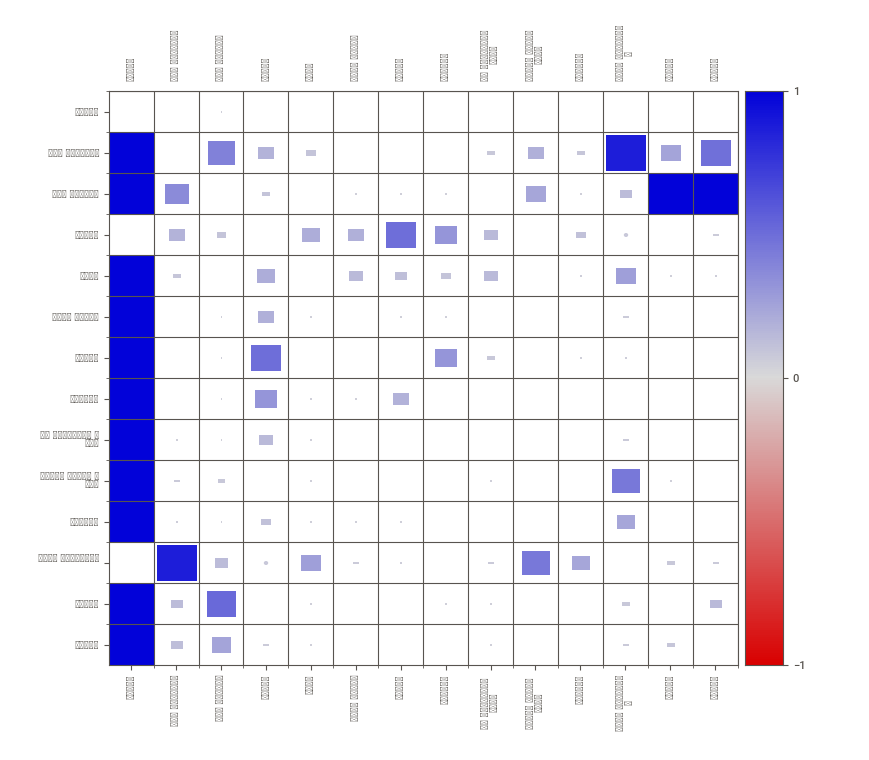
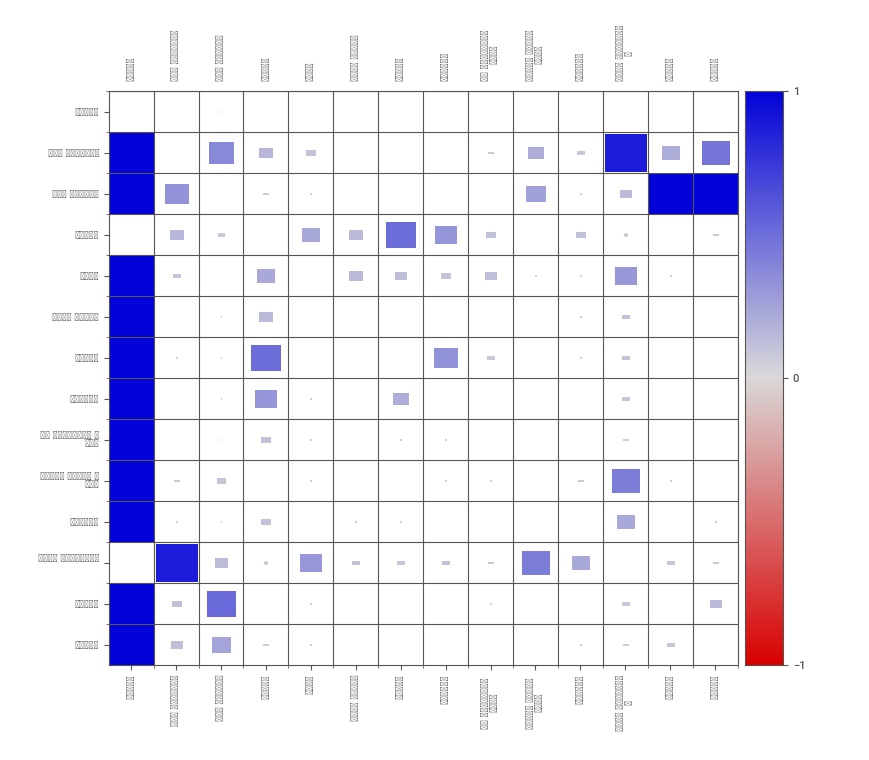

In [ ]:
my_report.show_notebook()